# K-Means Clustering

### Import Library

Libray yang akan mendukung proses Clustering diimport

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
data = pd.read_csv("abstrak_pta_manajemen.csv",error_bad_lines=False,usecols =["Abstrak_indo"])
data.head()

C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_9016/1278210932.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("abstrak_pta_manajemen.csv",error_bad_lines=False,usecols =["Abstrak_indo"])


,Abstrak_indo
0,ABSTRAK\r\...
1,Pendekatan penelitian yang digunakan dalam pen...
2,ABSTRAK\r\n\tTujuan penelitian ini adalah mend...
3,ABSTRAK\r\nTujuan penelitian ini adalah untuk ...
4,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abstrak_indo  12 non-null     object
dtypes: object(1)
memory usage: 224.0+ bytes


# NLP 

# Mempersiapkan data untuk vektorisasi
Namun, ketika melakukan pemrosesan bahasa alami, kata-kata harus diubah menjadi vektor yang dapat digunakan oleh algoritma pembelajaran mesin. Jika tujuan Anda adalah melakukan pembelajaran mesin pada data teks, seperti ulasan film atau tweet atau apa pun, Anda perlu mengubah data teks menjadi angka. Proses ini kadang-kadang disebut sebagai "penyematan" atau "vektorisasi".

Dalam hal vektorisasi, penting untuk diingat bahwa itu tidak hanya mengubah satu kata menjadi satu angka. Sementara kata-kata dapat diubah menjadi angka, seluruh dokumen dapat diterjemahkan ke dalam vektor. Vektor tidak hanya dapat memiliki lebih dari satu dimensi, tetapi dengan data teks, vektor biasanya berdimensi tinggi. Ini karena setiap dimensi data fitur Anda akan sesuai dengan sebuah kata, dan bahasa dalam dokumen yang Anda periksa akan memiliki ribuan kata.

# TF-IDF
Dalam temu kembali informasi, tf–idf atau TFIDF, kependekan dari term frequency-inverse document frequency, adalah statistik numerik yang dimaksudkan untuk mencerminkan betapa pentingnya sebuah kata bagi dokumen dalam kumpulan atau korpus. Ini sering digunakan sebagai faktor pembobotan dalam pencarian temu kembali informasi, penambangan teks, dan pemodelan pengguna. Nilai tf-idf meningkat secara proporsional dengan berapa kali sebuah kata muncul dalam dokumen dan diimbangi oleh frekuensi kata dalam korpus, yang membantu menyesuaikan fakta bahwa beberapa kata muncul lebih sering secara umum. Saat ini, tf-idf adalah salah satu skema pembobotan term yang paling populer; 83% sistem rekomendasi berbasis teks dalam domain perpustakaan digital menggunakan tf-idf.

Variasi skema pembobotan tf-idf sering digunakan oleh mesin pencari sebagai alat utama dalam penilaian dan peringkat relevansi dokumen yang diberikan permintaan pengguna. tf–idf dapat berhasil digunakan untuk pemfilteran stop-words di berbagai bidang subjek, termasuk peringkasan dan klasifikasi teks.

Salah satu fungsi peringkat paling sederhana dihitung dengan menjumlahkan tf–idf untuk setiap istilah kueri; banyak fungsi peringkat yang lebih canggih adalah varian dari model sederhana ini.

## Stopword

In [9]:
stop_words = stopwords.words('indonesian')
stop_words.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
desc = data['Abstrak_indo'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [8]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

459
[]


# Stemming
Stemming adalah proses mereduksi sebuah kata menjadi batangnya, yaitu bentuk akarnya. Bentuk akar belum tentu kata itu sendiri, tetapi dapat digunakan untuk menghasilkan kata-kata dengan menggabungkan sufiks yang tepat. Misalnya, kata ikan, ikan, dan memancing semuanya berasal dari ikan, yang merupakan kata yang benar. Di sisi lain, kata studi, studi, dan studi berasal dari studi, yang bukan merupakan kata bahasa Inggris.

# Tokenisasi
Tokenisasi adalah memecah kalimat menjadi kata-kata dan tanda baca,

In [10]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

Vektorisasi dengan stopword (kata-kata yang tidak relevan dengan model), stemming dan tokenizing

In [11]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\WINDOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arti', 'asa', 'buah', 'bum', 'enak', 'hadap', 'ikan', 'ira', 'jenak', 'kali', 'kena', 'kerja', 'khusus', 'laku', 'langsung', 'lihat', 'maksud', 'masuk', 'mata', 'mena', 'nyata', 'olah', 'orang', 'rupa', 'sampa', 'sangkut', 'sekal', 'sekira', 'sin', 'tama', 'tuju', 'upa', 'utama'] not in stop_words.
  warnings.warn(


371
['a', 'abstrak', 'accidental', 'adaro', 'adjusted', 'agro', 'aksesibilitas', 'aktif', 'aktiva', 'alami', 'alat', 'alkirom', 'ambil', 'analis', 'analisis', 'analitik', 'anugrahini', 'aplikasi', 'arti', 'astra', 'asumsi', 'aththaariq', 'aulia', 'b', 'bangkal', 'bank', 'bantu', 'baur', 'bebas', 'beda', 'beli', 'bentuk', 'beta', 'bijak', 'bimbing', 'bintang', 'buah', 'budaya', 'bukti', 'bursa', 'businees', 'business', 'butuh', 'buyung', 'cabang', 'cair', 'camat', 'capai', 'ci', 'cipta']


In [12]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

# Proses K-means clustering

# Metode siku untuk memilih jumlah cluster
Metode ini melihat persentase varians yang dijelaskan sebagai fungsi dari jumlah cluster: Seseorang harus memilih sejumlah cluster sehingga menambahkan cluster lain tidak memberikan pemodelan data yang jauh lebih baik. Lebih tepatnya, jika seseorang memplot persentase varians yang dijelaskan oleh cluster terhadap jumlah cluster, cluster pertama akan menambah banyak informasi (menjelaskan banyak varians), tetapi pada titik tertentu keuntungan marjinal akan turun, memberikan sudut di grafik. Jumlah cluster dipilih pada titik ini, maka "kriteria siku". "Siku" ini tidak selalu dapat diidentifikasi dengan jelas. Persentase varians yang dijelaskan adalah rasio varians antar-kelompok terhadap varians total, juga dikenal sebagai uji-F. Sedikit variasi dari metode ini memplot kelengkungan varians dalam grup.

### Pada dasarnya, jumlah cluster = nilai sumbu x dari titik yang merupakan sudut "siku" (plotnya sering terlihat seperti siku)

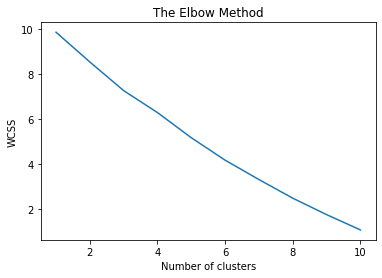

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [14]:
print(words[250:300])

['profesionalisme', 'profitabilitas', 'program', 'promosi', 'proporsi', 'psikologis', 'pt', 'puas', 'purposive', 'purpossive', 'pustaka', 'putus', 'r', 'random', 'rasio', 'rasional', 'ratio', 'recovery', 'reduction', 'regresi', 'reliabilitas', 'reputasi', 'responden', 'return', 'returns', 'reza', 'risiko', 'risk', 'rm', 'roe', 'rumah', 'rupa', 's', 'saham', 'saing', 'sakit', 'salah', 'sampel', 'sampling', 'sampoerna', 'satiyah', 'sdm', 'sebar', 'segi', 'seleksi', 'sepeda', 'sertifikasi', 'service', 'serviscape', 'servisecape']


# 3 Clusters

In [15]:
kmeans = KMeans(n_clusters = 3, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : produk, beli, putus, uji, kualitas, harga, pengaruh, variabel, bangkal, hadap, konsumen, merek, teliti, camat, xl, distribusi, martabak, hawaii, susu, cair, indomilk, langgan, promosi, perilaku, psikologis
1 : ratio, tbk, current, equity, pt, return, portofolio, profitabilitas, saham, to, uji, teliti, debt, roe, risk, firm, on, leverage, size, usaha, pengaruh, indonesia, signifikan, payout, businees
2 : x, kerja, kompensasi, kompetensi, variabel, pengaruh, finansial, inovasi, unggul, saing, produktivitas, langsung, dosen, teliti, hadap, latih, faktor, tingkat, karyawan, pegawai, kembang, pasar, data, optik, lamongan


# 5 Clusters

In [16]:
kmeans = KMeans(n_clusters = 5, n_init = 20)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : saing, unggul, inovasi, pasar, optik, reza, lamongan, tingkat, data, kerja, alami, jawa, terap, laku, teliti, conclusion, omzet, timur, tawar, display, drawing, observasi, buah, dokumen, jual
1 : produk, beli, putus, uji, kualitas, harga, pengaruh, variabel, bangkal, hadap, konsumen, merek, teliti, camat, xl, distribusi, martabak, hawaii, susu, cair, indomilk, langgan, promosi, perilaku, psikologis
2 : x, kompetensi, kerja, produktivitas, dosen, variabel, pengaruh, latih, faktor, kembang, pegawai, hadap, ikan, laut, dinas, teliti, pasien, pedagogik, puas, sakit, padu, recovery, surabaya, rumah, y
3 : ratio, tbk, current, equity, pt, return, portofolio, profitabilitas, saham, to, uji, teliti, debt, roe, risk, firm, on, leverage, size, usaha, pengaruh, indonesia, signifikan, payout, businees
4 : kompensasi, finansial, langsung, karyawan, nonfinansial, kerja, fhitung, signifikan, variabel, pengaruh, hadap, kantor, cabang, pos, p, persero, nilai, alat, pt, simultan, bantu, teliti, mili

# 6 Clusters

In [17]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : produk, beli, putus, uji, kualitas, harga, pengaruh, variabel, bangkal, hadap, konsumen, merek, teliti, camat, xl, distribusi, martabak, hawaii, susu, cair, indomilk, langgan, promosi, perilaku, psikologis
1 : ratio, current, equity, profitabilitas, uji, debt, roe, size, leverage, risk, firm, on, usaha, to, teliti, return, pengaruh, signifikan, payout, businees, dividend, variabel, efek, daftar, bursa
2 : x, kompetensi, kerja, produktivitas, dosen, variabel, pengaruh, latih, faktor, kembang, pegawai, hadap, ikan, laut, dinas, teliti, pasien, pedagogik, puas, sakit, padu, recovery, surabaya, rumah, y
3 : saing, unggul, inovasi, pasar, optik, reza, lamongan, tingkat, data, kerja, alami, jawa, terap, laku, teliti, conclusion, omzet, timur, tawar, display, drawing, observasi, buah, dokumen, jual
4 : tbk, pt, portofolio, saham, return, optimal, risiko, astra, excess, kandidat, beta, to, indonesia, off, dana, indeks, tunggal, cut, energy, bentuk, hitung, investasi, point, teliti, dasar
5